# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

pd.set_option('display.max_rows', None)

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

TARGET_deathRate           1.000000
PctBachDeg25_Over         -0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                 -0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over        -0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage        -0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone   -0.355050
PctMarriedHouseholds      -0.290645
PctBachDeg18_24           -0.284566
PctHS18_24                 0.266285
PercentMarried            -0.266153
PctEmpPrivCoverage        -0.259006
PctBlack                   0.236380
PctSomeCol18_24           -0.186140
PctOtherRace              -0.182602
PctAsian                  -0.181948
PctWhite                  -0.174521
avgAnnCount               -0.150019
popEst2015                -0.130122
avgDeathsPerYear          -0.094048
PctNoHS18_24               0.090565
BirthRate                 -0.088543
AvgHouseholdSize          -0

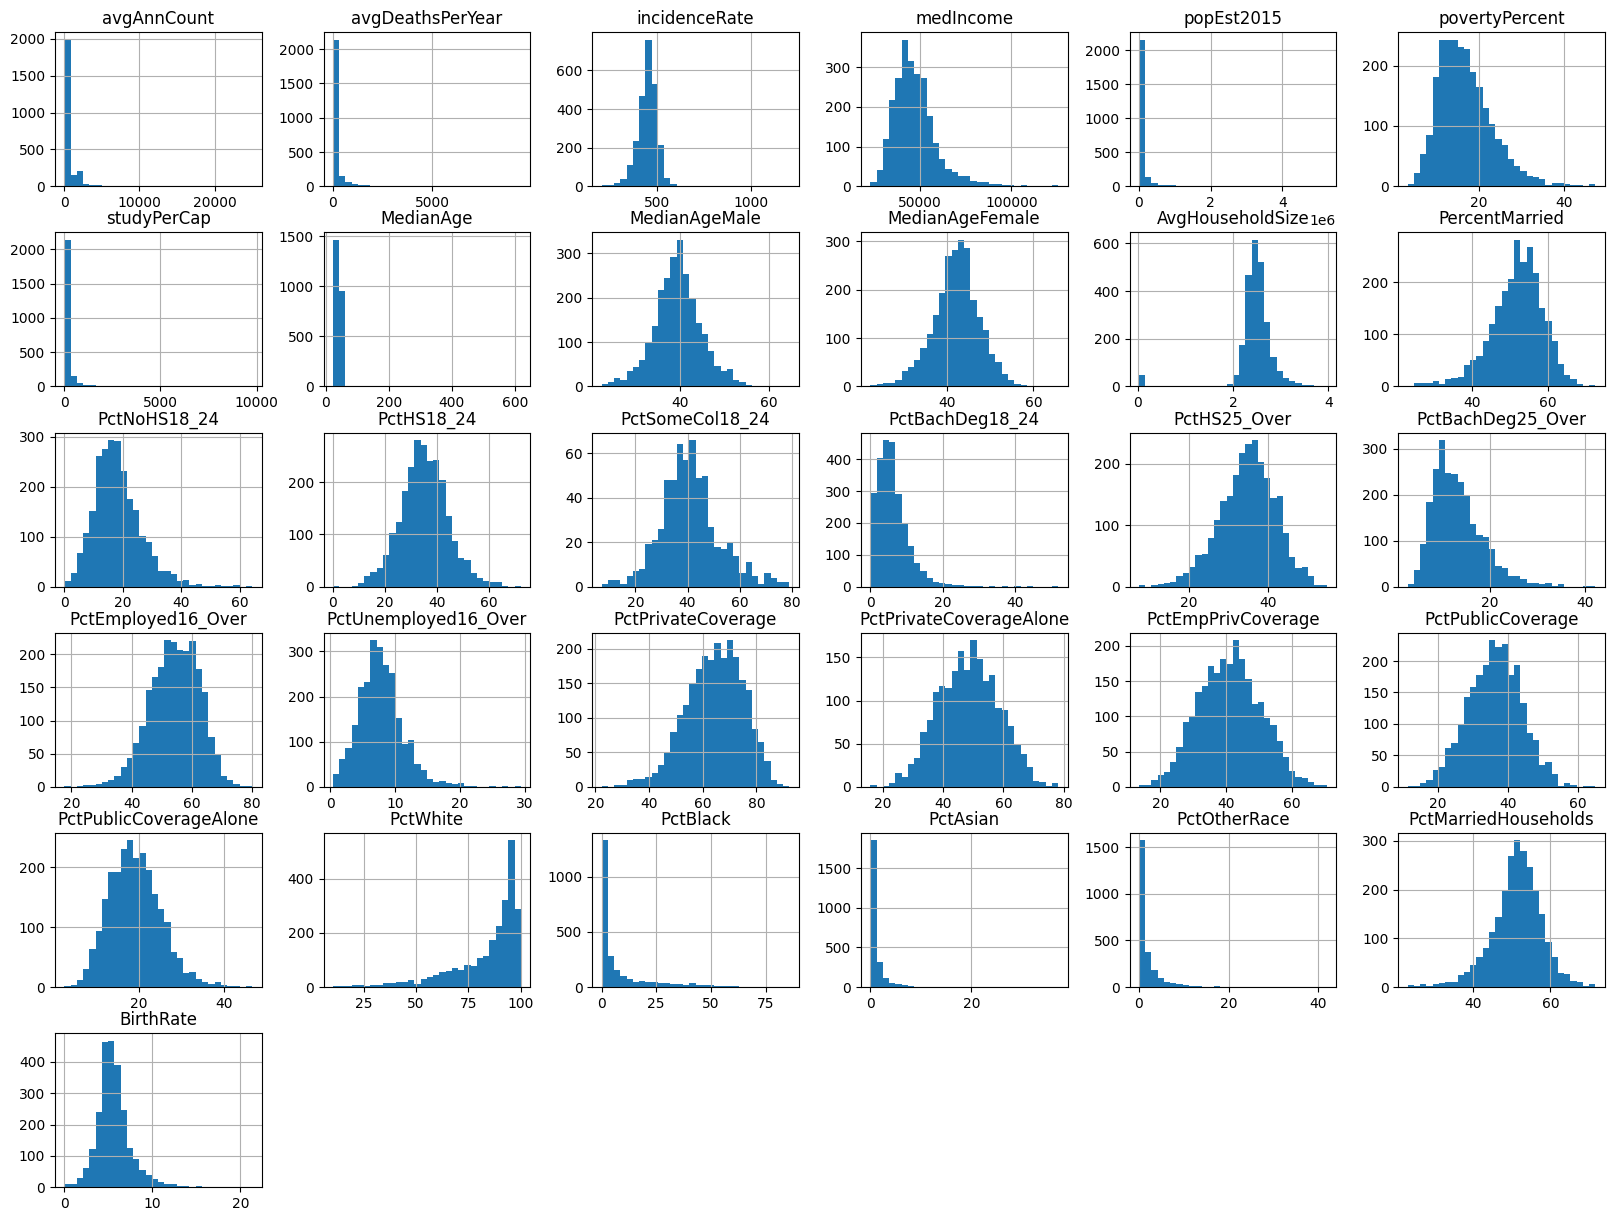

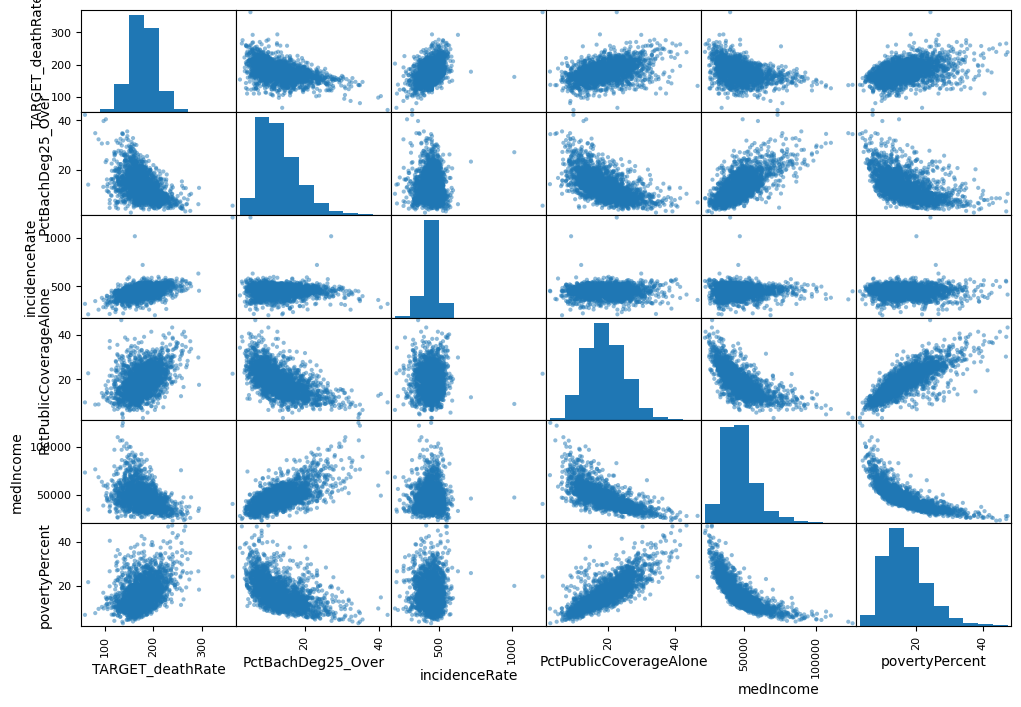

In [2]:
# read in training and target files as csv
training = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

# histograms for all features 
training.hist(bins=30, figsize=(20,15))

# identify outliers
# avgHouseholdSize has a small value which outlies from the rest of the data
# by examining the training dataset directly, I also noticed some very 
# implausible values for the median age variable. There were 26 records where 
# the median age was more than 300 - this obviously could not be true
# small bars, huge whitespace (range extends far), large scale for x axis - outliers exist inthe distribution, but not necessarily implausible e.g. predominantly black areas

combined = pd.merge(training, targets, left_index=True, right_index=True)
corr_matrix=combined.corr()
sortedCorrs = corr_matrix.reindex(corr_matrix.TARGET_deathRate.abs().sort_values(ascending=False).index)["TARGET_deathRate"]
print(sortedCorrs)

attributes=["TARGET_deathRate","PctBachDeg25_Over","incidenceRate","PctPublicCoverageAlone","medIncome","povertyPercent"]

scatter_matrix(combined[attributes],figsize=(12,8))

plt.savefig('scatter_matrix.png')

# PctPublicCoverageAlone - PovertyPercent
# When plotting PovertyPercent against PctPublicCoverageAlone, there is a clear and strong positive correlation between the features.
# As the value for PovertyPercent increases i.e., the percentage of the populace in poverty increase, the value for PctPublicCoverageAlone also increases i.e., the percentage of the 
# population with government funded healthcare also increases. This makes sense intuitively, as you'd expect there to be more
# people who require government funding for healthcare in areas of higher poverty.

# PctBachDeg25_Over - medIncome
# When plotting PctBachDeg25_Over (the percentage of the population in a county aged 25< with a degree) against the medianIncome 
# in the respective county, there is a clear positive correlation between the two features. This also makes sense intuitively, as you'd 
# expect the average salary to increase given that someone has a degree and hence, where there is a higher percentage of people
# with degrees, you find a higher median income value for that county. 


***OUTLIERS:***
- avgHouseholdSize has a small bar towards 0 which outlies from the rest of the data
  - when looking directly at the dataset, there exists 48 records with extremely low values for this feature, which outlie from the rest of the values for the avgHouseholdSize feature
  - it doesn't make sense for mean household size to be less than 1 person

- After noticing the large scale for median age and examining the training dataset directly, I also noticed some very implausible values for the median age variable. 
  - There were 26 records where the median age was more than 300 - this obviously could not be true
  - an age more than 150 is not realistic, considering the oldest person alive is 118...
  - and lives in France

- A few other features also seemed to have outliers. I noticed a lot of features that had a majority of the data distributed in one area of the histogram with a large amount of whitespace on either the right, left or both sides with very small bars at extreme values of the x axis. I considered these features as having outliers, however I wouldn't say the values were necessarily implausible since, for example, an extremely high value for PctBlack could exist in counties where the majority of the population are black.
  - Features related to this would be: avgAnnCount, avgDeathsPerYear, incidenceRate, medIncome, popEst2015, studyPerCap, PctWhite, PctBlack, PctAsian, PctOtherRace


***CORRELATIONS:***
- order of correlations (using absolute value) - the rest of the features are printed above
  - "PctBachDeg25_Over"
  - "incidenceRate"
  - "PctPublicCoverageAlone"
  - "medIncome"
  - "povertyPercent"

- related features:
  - PctPublicCoverageAlone - PovertyPercent
    - When plotting PovertyPercent against PctPublicCoverageAlone, there is a clear and strong positive correlation between the features.
As the value for PovertyPercent increases i.e., the percentage of the populace in poverty increase, the value for PctPublicCoverageAlone also increases i.e., the percentage of the 
population with government funded healthcare also increases. This makes sense intuitively, as you'd expect there to be more
people who require government funding for healthcare in areas of higher poverty.

  - PctBachDeg25_Over - medIncome
    - When plotting PctBachDeg25_Over (the percentage of the population in a county aged 25< with a degree) against the medianIncome 
in the respective county, there is a clear positive correlation between the two features. This also makes sense intuitively, as you'd 
expect the average salary to increase given that someone has a degree and hence, where there is a higher percentage of people
with degrees, you find a higher median income value for that county. 

In [3]:
# for my own interest, to see how other features correlate with each other
# attributes=["TARGET_deathRate","incidenceRate","PctPublicCoverageAlone","medIncome","povertyPercent", "avgAnnCount", "avgDeathsPerYear", "popEst2015"]

# scatter_matrix(combined[attributes],figsize=(12,8), alpha=0.3)
# plt.savefig('scatter_matrix_full.png')

In [4]:
# calc ranges
# columns = combined.columns.values.tolist()

# for column in columns:
#   range = combined[column].max() - combined[column].min()
#   print(f"column: {column}, range: {range}")

# median age range shows there are outliers in median age

In [5]:
# show maximums
# columns = combined.columns.values.tolist()

# for column in columns:
#   max = combined[column].max()
#   print(f"column: {column}, max: {max}")

# median age definitely has outliers

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [6]:
# remove the rows with unrealistic median age values and avgHouseholdSize values
from sklearn.base import BaseEstimator

remove_columns = ['MedianAge', 'MedianAgeFemale', 'studyPerCap', 'AvgHouseholdSize', 
                    'PctPrivateCoverageAlone', 'PctNoHS18_24', 'PctSomCol18_24']

class RemoveImplausibleValues(BaseEstimator):
    
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        # x = X.copy(deep=True)
        X = X[~((X['MedianAge'] > 150) | (X['AvgHouseholdSize'] <1))]
        # for column in x.columns:
        #     if x[column].isnull().sum() > 0:
        #         print(column)
        #         missing_columns.append(column)
        #         x.drop(column, axis=1, inplace=True)

        return X


# print(len(combined))
# combined = combined[~((combined['MedianAge'] > 300) | (combined['AvgHouseholdSize'] <1))]
# print(len(combined))


***REMOVING IMPLAUSIBLE VALUES FROM THE DATASET:*** I decided to remove the outliers mentioned earlier by removing any records with median age over 150 or avg household size less than 1. These rules make intuitive sense, so should fit well even with an unseen test set, since it is currently impossible to find a human over the age of 150 and does not make sense for an average household size to be less than 1 person (especially when the rest of the dataset are distributed between having 1-2 people on average, per household).

In [7]:
# before splitting the data, remove records with implausible values
# create scikit learn pipeline
from sklearn.pipeline import Pipeline

initial_pipeline = Pipeline([
    ('RemoveImplausibleValues',RemoveImplausibleValues())
])

print(len(combined))
combined_ppln = initial_pipeline.fit_transform(combined).reset_index(drop=True)
# combined_ppln["TARGET_deathRate"].head()
print(len(combined_ppln))


2438
2364


In [8]:
# recalculate correlations
corr_matrix=combined_ppln.corr()
sortedCorrs = corr_matrix.reindex(corr_matrix.TARGET_deathRate.abs().sort_values(ascending=False).index)["TARGET_deathRate"]
print(sortedCorrs)

TARGET_deathRate           1.000000
PctBachDeg25_Over         -0.491019
PctPublicCoverageAlone     0.440050
incidenceRate              0.438377
medIncome                 -0.419169
povertyPercent             0.418191
PctHS25_Over               0.411210
PctEmployed16_Over        -0.404002
PctPublicCoverage          0.391543
PctPrivateCoverage        -0.387854
PctUnemployed16_Over       0.365140
PctPrivateCoverageAlone   -0.360537
PctMarriedHouseholds      -0.294054
PctBachDeg18_24           -0.286767
PercentMarried            -0.270286
PctHS18_24                 0.268260
PctEmpPrivCoverage        -0.258555
PctBlack                   0.241638
PctSomeCol18_24           -0.194756
PctOtherRace              -0.182543
PctAsian                  -0.182094
PctWhite                  -0.177209
avgAnnCount               -0.152698
popEst2015                -0.130355
PctNoHS18_24               0.097600
avgDeathsPerYear          -0.095143
BirthRate                 -0.093588
MedianAgeMale             -0

Any changes from before removing weird values?

In [9]:
print(combined_ppln.columns[combined_ppln.isnull().any()].tolist())
PctSomeCol18_24 = combined_ppln['PctSomeCol18_24'].isnull().sum()
PctEmployed16_Over = combined_ppln['PctEmployed16_Over'].isnull().sum()
PctPrivateCoverageAlone = combined_ppln['PctPrivateCoverageAlone'].isnull().sum()

print("PctSomeCol18_24", PctSomeCol18_24, 100*(PctSomeCol18_24/len(combined_ppln)))
print('PctEmployed16_Over', PctEmployed16_Over, 100*(PctEmployed16_Over/len(combined_ppln)))
print('PctPrivateCoverageAlone', PctPrivateCoverageAlone, 100*(PctPrivateCoverageAlone/len(combined_ppln)))

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']
PctSomeCol18_24 1779 75.25380710659898
PctEmployed16_Over 115 4.864636209813875
PctPrivateCoverageAlone 469 19.83925549915398


- ['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone'] have missing values
- PctSomCol18_24 has a huge amount missing (75%)
  - -0.186140 correlation 
  - 18th most correlated - in the bottom 50% of features in terms of correlation
- PctEmployed16_Over has only a few (5%)
  - -0.400317 correlation 
  - 7th most correlated  - this is high!
- PctPrivateCoverageAlone has a lot missing (20%)
  - -0.355050 correlation 
  - 11th most correlated - also quite high

In [10]:
# split data to train and test set
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit

def stratified_split(df, feature):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
    
    # returns 2 sets of indexes for test and train
    # hence, .loc is used on the dataset df to retrieve the corresponding records
    for train_index, test_index in split.split(df,df[feature]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
    
    # for set_ in (strat_train_set, strat_test_set):
    #     set_.drop((feature),axis=1,inplace=True)
        
   
    return strat_train_set, strat_test_set


def shuffle_split(df, target):
    split = ShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
    
    # returns 2 sets of indexes for test and train
    # hence, .loc is used on the dataset df to retrieve the corresponding records
    for train_index, test_index in split.split(df,df[target]):
        train_set = df.loc[train_index]
        test_set = df.loc[test_index]
    
#     for set_ in (strat_train_set, strat_test_set):
#         set_.drop((target),axis=1,inplace=True)
        
   
    return train_set, test_set


train_set, test_set = shuffle_split(combined_ppln, 'TARGET_deathRate')

training_set=train_set.drop("TARGET_deathRate",axis=1)
training_labels=train_set["TARGET_deathRate"].copy()

testing = test_set.drop("TARGET_deathRate",axis=1)
testing_labels= test_set["TARGET_deathRate"].copy()



In [11]:
len(training_set), len(testing)

(1891, 473)

In [12]:
combined.info()
# NOTE: PctSomeCol18_24, PctEmployed16_Over,PctPrivateCoverageAlone all contain 
# less than 2438 non-null values i.e. have null values which require imputing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [13]:
# it seems some columns (PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone) have null values - 
# let's validate this
# print(combined['PctSomeCol18_24'].isnull().any())
# print(combined['PctEmployed16_Over'].isnull().any())
# print(combined['PctPrivateCoverageAlone'].isnull().any())


In [14]:
# impute - currently using median!
# from sklearn.impute import SimpleImputer

# imputer=SimpleImputer(strategy="median")
# # fit
# imputer.fit(combined)
# # array of size 32, with median value of each column
# imputer.statistics_ 
# # transform
# x = imputer.transform(combined)
# x.shape
# # turn np.array back into dataframe
# combined = pd.DataFrame(x,columns=combined.columns)
# combined.info()


***Q to self: IS MEDIAN THE BEST CHOICE TO IMPUTE WITH? TRY WITH MODE / MEAN AND SEE WHICH YIELDS BETTER RESULTS***

In [15]:
# aggregate and add features


# normalise - make values 0 to 1 - used for neural networks


# Standardise - minus mean, divide by variance


# no encoding needed e.g. one hot encoding, since all variables are numerical


In [16]:
# create scikit learn pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np


In [17]:
# could try other imputer types - this one is "simple"
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

training_ppln = pipeline.fit_transform(training_set)
print(len(training_ppln))
# type(combined_ppln), combined.columns
# turn it back into a df
# training_ppln = pd.DataFrame(data=training_ppln, columns=training.columns)
# print(training_ppln.info())

1891


***PIPELINE:*** Imputed since there were missing values in the dataset - used simple imputer with median. StandardScaler to scale the data to be 0 centered with 1 variance - improves model performance (and interpretability).

In [18]:
training_ppln_df = pd.DataFrame(data=training_ppln, columns=training_set.columns)
training_ppln_df.head()


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.606955,0.784927,0.197423,-0.246015,0.607828,0.122840,0.712472,-0.511161,-0.513244,-0.547157,...,0.068821,0.277236,-0.261135,0.115214,-0.671723,0.825147,0.397924,0.008922,-0.395675,0.072079
1,-0.376242,-0.304610,-0.609327,-0.029155,-0.264041,-0.301938,-0.299639,-1.173854,-1.095521,-1.013151,...,0.689936,0.747821,-1.214027,-0.572868,-0.032942,-0.386060,-0.166711,0.419784,-0.089932,-0.943053
2,-0.215513,-0.156222,0.243895,-0.093581,-0.193009,-0.396333,-0.299639,1.041436,1.139673,0.888104,...,0.023649,0.159590,0.796183,0.249474,0.704419,-0.492477,-0.240134,-0.417015,-0.753966,-0.741561
3,-0.421854,-0.361526,-1.044302,-0.432893,-0.322450,-0.160345,-0.299639,0.757424,0.876709,0.627148,...,0.023649,-0.524897,0.156571,-0.354696,-0.099283,-0.616138,0.621165,0.318093,-0.526243,1.048806
4,0.973785,-0.097273,0.105398,-0.112193,-0.166018,0.374560,-0.229778,0.321940,0.294431,0.403470,...,-0.292555,0.041943,-0.091442,-0.086176,-0.058628,-0.562605,0.703252,1.603883,-1.287352,-0.687503


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [19]:
# use combined df
# split train test sets 80:20 - use stratified sampling based on a feature/variable?
# do linear regression on training set with cross validation 
# get metrics from cross validation and aggregate results (E.g. avg)
# to measure how effective selected hyperparameters are
# use gridsearchCV to automatically find the best hyper parameters for model


In [20]:
some_data=testing
some_labels=testing_labels
some_data_prepared=pipeline.transform(some_data)

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#OLS - Ordinary Least Squares

lin_reg=LinearRegression()
lin_reg.fit(training_ppln, training_labels)


LinearRegression()

In [22]:
predicted = lin_reg.predict(some_data_prepared)
ols_metrics = {}
# print("Predictions:", predicted)
# print("Labels:", list(some_labels))
ols_metrics['mse'] = mean_squared_error(list(some_labels), predicted)
ols_metrics['rmse'] = np.sqrt(ols_metrics['mse'])
ols_metrics['mae'] = mean_absolute_error(list(some_labels), predicted)
ols_metrics['r2'] = r2_score(list(some_labels), predicted)

print(ols_metrics)


{'mse': 407.2676933635218, 'rmse': 20.180874444966992, 'mae': 14.060635605792323, 'r2': 0.4480111196484682}


In [23]:
lasso_best_alphas = []

In [24]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

#regularisation strength - alpha
param_grid = {'alpha': np.arange(0.03,0.05,0.0001)}


# Create a GridSearchCV object - using 5 folds, could try 10 folds too or more
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the model to the data using the grid search object
grid_search.fit(training_ppln, training_labels)

# Get the best regularization weight
best_alpha = grid_search.best_params_['alpha']
lasso_best_alphas.append(best_alpha)
best_alpha

0.031499999999999986

In [25]:
lasso_best_alphas

[0.031499999999999986]

***BEST LASSO REGULARISATION WEIGHT:***
The best value of alpha found for Lasso was 0.0415. I found this value for alpha by starting with a relatively large range of values for alpha (0.01 to 10, incrementing with 0.01) and iteratively narrowing down the range (and size of increments) to converge on a more optimal (and granular) value for alpha.
The best values found for alpha after each iteration were \[0.01, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04,0.042, 0.041, 0.0415\]
However, I decided to try it for a second time.

**SECOND TIME ROUND:**
The best values found for alpha after each iteration were \[0.03, 0.032, 0.0315, 0.0315\]

**DECIDER:**
To decide on which value to use (between 0.0315 and 0.0415), I tested the range from 0.03 to 0.05, incrementing by 0.0001. The best value for alpha was shown to be 0.0315


So, the value I decided to use was 0.0315 for alpha.

**Testing:**
When testing the model below, I still tested 0.0415 against 0.0315, even though 0.0315 was evaluated to be the best value for alpha on multiple occasions (even when tested against 0.0415), when using GridSearchCV. Using the test blocks below, 0.0415 actually performed better than 0.0315, however, I decided to stick with 0.0315 since the metrics calculated by GridSearchCV are an average of 10 cross validation folds, where as my test set was only obtained by shuffle splitting on 20% of the data. Hence, when my model has to deal with new unseen data, I trust the results from CV to give me a better indicator of which value of alpha is better, compared to the results obtained from simply testing with my test data from an 80:20 test split.

Essentially, since CV tests using multiple train/test splits, as opposed to using 1 test split, the result from CV is more reliable and uses an averaged result.

In [26]:
lasso_scores = {}

In [27]:
a = 0.0315
lasso = Lasso(alpha=a).fit(training_ppln, training_labels)

In [28]:
predicted = lasso.predict(some_data_prepared)

metrics = {}

metrics['mse'] = mean_squared_error(list(some_labels), predicted)
metrics['rmse'] = np.sqrt(metrics['mse'])
metrics['mae'] = mean_absolute_error(list(some_labels), predicted)
metrics['r2'] = r2_score(list(some_labels), predicted)

lasso_scores[a] = metrics

print(f"{a} : {metrics}")

0.0315 : {'mse': 403.34529547844045, 'rmse': 20.083458254953015, 'mae': 14.030140673720128, 'r2': 0.45332732825563293}


In [29]:
lasso_scores
# a big difference between MAE and RMSE could suggest outliersa are affecting the scoring since MSE/RMSE are not robust to outliers (MAE is)

{0.0315: {'mse': 403.34529547844045,
  'rmse': 20.083458254953015,
  'mae': 14.030140673720128,
  'r2': 0.45332732825563293}}

In [30]:
ridge_best_alphas = []

In [58]:
ridge = Ridge()

#regularisation strength - alpha
param_grid = {'alpha': np.arange(0.001, 20, 0.001)}


# Create a GridSearchCV object - using 5 folds, could try 10 folds too or more
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data using the grid search object
grid_search.fit(training_ppln, training_labels)

# Get the best regularization weight
best_alpha = grid_search.best_params_['alpha']
ridge_best_alphas.append(best_alpha)
best_alpha

13.352

In [59]:
ridge_best_alphas

[13.351999999999805, 13.352]

***BEST RIDGE REGULARISATION WEIGHT:***
The best value of alpha found for Lasso was 13.35. I found this value for alpha by starting with a relatively large range of values for alpha (0.01 to 100, increment of 0.01) and iteratively narrowing down the range to  converge on a more optimal value for alpha.
The best values found for alpha after each iteration were \[10, 10, 15, 12.5, 13.75, 13, 13.5, 13.25, 13.4, 13.35, 13.35, 13.35\]

**SECOND TRY:**
The best values found for alpha after each iteration were \[ 13.35, 13, 13.4, 13.35, 13.352\]

***OVERALL:*** Both tests seemed to agree on ~13.35 being the best regularisation weight, hence I used *13.352*


In [33]:
ridge_scores = {}

In [34]:
ridge_a = 13.352
ridge = Ridge(alpha=ridge_a).fit(training_ppln, training_labels)

In [35]:
predicted = ridge.predict(some_data_prepared)

ridge_metrics = {}

ridge_metrics['mse'] = mean_squared_error(list(some_labels), predicted)
ridge_metrics['rmse'] = np.sqrt(ridge_metrics['mse'])
ridge_metrics['mae'] = mean_absolute_error(list(some_labels), predicted)
ridge_metrics['r2'] = r2_score(list(some_labels), predicted)

ridge_scores[ridge_a] = ridge_metrics

print(f"{ridge_a} : {ridge_metrics}")


13.352 : {'mse': 403.62853967476633, 'rmse': 20.09050869626666, 'mae': 14.034890661171678, 'r2': 0.4529434341993557}


In [36]:
ridge_scores

{13.352: {'mse': 403.62853967476633,
  'rmse': 20.09050869626666,
  'mae': 14.034890661171678,
  'r2': 0.4529434341993557}}

In [60]:
# compare the scores to choose best model
print(f"OLS: \n{ols_metrics} \nLasso: \n{lasso_scores} \nRidge: \n{ridge_scores}")

OLS: 
{'mse': 407.2676933635218, 'rmse': 20.180874444966992, 'mae': 14.060635605792323, 'r2': 0.4480111196484682} 
Lasso: 
{0.0315: {'mse': 403.34529547844045, 'rmse': 20.083458254953015, 'mae': 14.030140673720128, 'r2': 0.45332732825563293}} 
Ridge: 
{13.352: {'mse': 403.62853967476633, 'rmse': 20.09050869626666, 'mae': 14.034890661171678, 'r2': 0.4529434341993557}}


***BEST PERFORMING LINEAR REGRESSOR:*** The Lasso model seems to perform the best in every metric (MSE, RMSE, MAE and r2 score). It has the lowest error values and highest r2 score, suggesting it is the best performing model.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [37]:
feature_weights = {}
feature_names = training_ppln_df.columns.values
weights = lasso.coef_
count = 0

for weight in weights:
    feature_weights[feature_names[count]] = {'weight':weight, 'abs_weight':np.abs(weight)}
    count +=1

sorted_feature_weights = sorted(feature_weights.items(), key=lambda x: x[1]['abs_weight'], reverse=True)

# top 5 features and their weights
print(sorted_feature_weights[:5],'\n')

count = 1
lasso_top_features = []
# print features
for fw in sorted_feature_weights[:5]:
    print(str(count)+".",fw[0])
    lasso_top_features.append(fw[0])
    count += 1

[('incidenceRate', {'weight': 11.130324000444176, 'abs_weight': 11.130324000444176}), ('PctPrivateCoverage', {'weight': -8.145030082195602, 'abs_weight': 8.145030082195602}), ('PercentMarried', {'weight': 7.474845189608681, 'abs_weight': 7.474845189608681}), ('PctBachDeg25_Over', {'weight': -6.769972224745146, 'abs_weight': 6.769972224745146}), ('avgDeathsPerYear', {'weight': 6.762637368818513, 'abs_weight': 6.762637368818513})] 

1. incidenceRate
2. PctPrivateCoverage
3. PercentMarried
4. PctBachDeg25_Over
5. avgDeathsPerYear


The top 5 most heavily weighted lasso features are printed in the cell above - they are ordered by absolute values of their weights

In [38]:
# print all lasso features and wights - help with feature selection
count = 1
for fw in sorted_feature_weights:
    print(f"{str(count)}. {fw[0]}, weight: {fw[1]['weight']}")
    count += 1

1. incidenceRate, weight: 11.130324000444176
2. PctPrivateCoverage, weight: -8.145030082195602
3. PercentMarried, weight: 7.474845189608681
4. PctBachDeg25_Over, weight: -6.769972224745146
5. avgDeathsPerYear, weight: 6.762637368818513
6. PctMarriedHouseholds, weight: -6.019944361975421
7. MedianAgeMale, weight: -4.453289383744793
8. avgAnnCount, weight: -3.9582048217854964
9. popEst2015, weight: -3.6736100939889997
10. PctWhite, weight: -3.6134557321089207
11. PctEmpPrivCoverage, weight: 3.5956427921150365
12. PctEmployed16_Over, weight: -3.4667854940266984
13. AvgHouseholdSize, weight: -3.218885826349145
14. PctHS18_24, weight: 2.9323901078580668
15. PctBlack, weight: -2.8880424765841326
16. PctOtherRace, weight: -2.7045103300965345
17. PctHS25_Over, weight: 2.3263352264988177
18. povertyPercent, weight: 2.3212803713813654
19. medIncome, weight: 2.1693742140036623
20. BirthRate, weight: -2.075037733605445
21. PctPublicCoverage, weight: -1.4675724498067158
22. PctUnemployed16_Over, we

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [39]:
from sklearn.ensemble import RandomForestRegressor


In [40]:
forest = RandomForestRegressor(random_state=21)
parameters = {
  'n_estimators': [10, 50, 100, 200, 300],
  'max_depth': [None, 5, 10, 20, 30, 40],
  "max_features" : [None, 1, 5, 10, 20, 30]
}

grid_search  = GridSearchCV(forest, parameters, scoring='neg_mean_squared_error', cv=10)
# grid_search.fit(training_ppln, np.ravel(training_labels))
# forest_predictions = grid_search.predict(some_data_prepared)
# best_params = grid_search.best_params_
# best_score_mse = grid_search.best_score_
# print(f"best_params: {best_params} \nbest_score: {best_score_mse}")


In [41]:
# 2nd gridsearch test - takes too long to run, over 1000 minutes!
# from sklearn.ensemble import RandomForestRegressor
# forest = RandomForestRegressor(random_state=21)
# parameters = {
#   'n_estimators': [50, 100, 200, 300, 500, 700, 900, 1000],
#   'max_depth': [None, 5, 8, 10, 15, 20, 25, 30, 35, 40],
#   "max_features" : [None, 1, 5, 8, 10, 15, 20, 30]
# }

# grid_search  = GridSearchCV(forest, parameters, scoring='neg_mean_squared_error', cv=10)

In [42]:
# 3rd gridsearch test
forest = RandomForestRegressor(random_state=21)
parameters = {
  'n_estimators': [10, 50, 100, 200, 300],
  'max_depth': [None, 5, 10, 15, 20, 30],
  "max_features" : [None, 1, 5, 10, 1, 20, 30]
}

grid_search  = GridSearchCV(forest, parameters, scoring='neg_mean_squared_error', cv=10)



In [43]:
grid_search.fit(training_ppln, training_labels)
# forest_predictions = grid_search.predict(some_data_prepared)
best_params = grid_search.best_params_
best_score_nmse = grid_search.best_score_
print(f"best_params: {best_params} \nbest_score: {best_score_nmse}")

KeyboardInterrupt: 

***1st test:*** best_params: {'max_depth': 30, 'max_features': 20, 'n_estimators': 100} 
best_score: -353.79785219521494

***2nd test***: 

In [44]:
# type(training_labels)

In [45]:
forest_scores = {}
forest_count = 1

In [46]:
forest_params = {'n_estimators': 100,
                'max_depth': 30,
                "max_features" : 20}

forest_scores[forest_count] = [forest_params]

forest = RandomForestRegressor(random_state=21, n_estimators = forest_params['n_estimators'], max_depth = forest_params['max_depth'], max_features = forest_params['max_features'])
forest.fit(training_ppln, training_labels)


RandomForestRegressor(max_depth=30, max_features=20, random_state=21)

In [47]:
# metrics RMSE, MSE, MAE, R2
# predicted = forest.predict(some_data_prepared)
forest_predictions = forest.predict(some_data_prepared)
forest_metrics = {}
# print("Predictions:", predicted)
# print("Labels:", list(some_labels))
forest_metrics['mse'] = mean_squared_error(list(some_labels), forest_predictions)
forest_metrics['rmse'] = np.sqrt(forest_metrics['mse'])
forest_metrics['mae'] = mean_absolute_error(list(some_labels), forest_predictions)
forest_metrics['r2'] = r2_score(list(some_labels), predicted)

print(forest_metrics)
forest_scores[forest_count].append(forest_metrics)

forest_count +=1

{'mse': 320.36344837490043, 'rmse': 17.898699628042827, 'mae': 13.185940606475151, 'r2': 0.4529434341993557}


In [67]:
# show top 5 features from RF
feature_weights = {}
feature_names = training_ppln_df.columns.values
weights = forest.feature_importances_
count = 0

for weight in weights:
    feature_weights[feature_names[count]] = {'weight':weight, 'abs_weight':np.abs(weight)}
    count +=1

sorted_feature_weights = sorted(feature_weights.items(), key=lambda x: x[1]['abs_weight'], reverse=True)

# top 5 features and their weights
print(sorted_feature_weights[:5],'\n')

count = 1
forest_top_features = []
# print features
for fw in sorted_feature_weights:
    print(str(count)+".",fw[0])
    if count <6:
        forest_top_features.append(fw[0])
    count += 1


[('incidenceRate', {'weight': 0.18711997457851964, 'abs_weight': 0.18711997457851964}), ('PctBachDeg25_Over', {'weight': 0.176037318563679, 'abs_weight': 0.176037318563679}), ('PctPublicCoverageAlone', {'weight': 0.04932767894369383, 'abs_weight': 0.04932767894369383}), ('medIncome', {'weight': 0.049139491299795036, 'abs_weight': 0.049139491299795036}), ('PctHS25_Over', {'weight': 0.04485698675506463, 'abs_weight': 0.04485698675506463})] 

1. incidenceRate
2. PctBachDeg25_Over
3. PctPublicCoverageAlone
4. medIncome
5. PctHS25_Over
6. povertyPercent
7. avgDeathsPerYear
8. PctOtherRace
9. PctEmployed16_Over
10. PctBlack
11. PctPrivateCoverage
12. PctHS18_24
13. popEst2015
14. PctUnemployed16_Over
15. PctMarriedHouseholds
16. PercentMarried
17. avgAnnCount
18. PctWhite
19. AvgHouseholdSize
20. BirthRate
21. PctAsian
22. PctNoHS18_24
23. PctBachDeg18_24
24. PctPublicCoverage
25. PctEmpPrivCoverage
26. MedianAgeFemale
27. MedianAge
28. MedianAgeMale
29. PctPrivateCoverageAlone
30. PctSomeCo

In [66]:
forest_top_features

['incidenceRate',
 'PctBachDeg25_Over',
 'PctPublicCoverageAlone',
 'medIncome',
 'PctHS25_Over']

**Random Forest vs Linear Regressors:**

In [56]:
# compare metrics with best linear model metrics - pick which yields better results
print(f"---- OLS Metrics ---- \n{ols_metrics}\n")
print(f"---- Lasso Metrics ---- \n{metrics}\n")
print(f"---- Ridge Metrics ---- \n{ridge_metrics}\n")
print(f"---- RF Metrics ---- \n{forest_metrics}\n")

# report which model provides the best results
print(f"---- Model with the best metrics ---- \n Random Forest\n")


---- OLS Metrics ---- 
{'mse': 407.2676933635218, 'rmse': 20.180874444966992, 'mae': 14.060635605792323, 'r2': 0.4480111196484682}

---- Lasso Metrics ---- 
{'mse': 403.34529547844045, 'rmse': 20.083458254953015, 'mae': 14.030140673720128, 'r2': 0.45332732825563293}

---- Ridge Metrics ---- 
{'mse': 403.62853967476633, 'rmse': 20.09050869626666, 'mae': 14.034890661171678, 'r2': 0.4529434341993557}

---- RF Metrics ---- 
{'mse': 320.36344837490043, 'rmse': 17.898699628042827, 'mae': 13.185940606475151, 'r2': 0.4529434341993557}

---- Model with the best metrics ---- 
 Random Forest



**Top 5 Features for Random Forest:**


Lasso features printed for ease of comparison

In [50]:
# top 5 features from random forest regressor
print(f"---- RF Top 5 Features ---- \n{forest_top_features}\n")

# compare with the list of features from lasso
print(f"---- Lasso Top 5 Features ---- \n{lasso_top_features}")

---- RF Top 5 Features ---- 
['incidenceRate', 'PctBachDeg25_Over', 'medIncome', 'PctHS25_Over', 'PctPublicCoverageAlone']

---- Lasso Top 5 Features ---- 
['incidenceRate', 'PctPrivateCoverage', 'PercentMarried', 'PctBachDeg25_Over', 'avgDeathsPerYear']


**Random Forest interesection and difference of features, with Lasso:**

In [57]:
# calculate intersection and differences with best linear regressor
linear_regressor_features = lasso_top_features

feature_intersection = []
rffeature_difference = []
lrfeature_difference = []

for rffeature in forest_top_features:
    if rffeature in linear_regressor_features:
        feature_intersection.append(rffeature)
    else:
        rffeature_difference.append(rffeature)

# get the rest of the unique features by comparing the other way
for lrfeature in linear_regressor_features:
    if not (lrfeature in forest_top_features):
        lrfeature_difference.append(lrfeature)

print(f"---- Intersection of Features with Lasso ---- \n{feature_intersection}\n")

print(f"---- Features exclusive to RF ---- \n{rffeature_difference}\n")

print(f"---- Features exclusive to LR ---- \n{lrfeature_difference}\n")





---- Intersection of Features with Lasso ---- 
['incidenceRate', 'PctBachDeg25_Over']

---- Features exclusive to RF ---- 
['medIncome', 'PctHS25_Over', 'PctPublicCoverageAlone']

---- Features exclusive to LR ---- 
['PctPrivateCoverage', 'PercentMarried', 'avgDeathsPerYear']



Similar to Lasso, the Random Forest Regressor highly prioritises the incidence rate of a county in predicting death rate. This could make sense since the more people there are diagnosed with cancer, the higher you could expect the death rate to be, in that county.
Another feature which overlaps with Lasso, is the PctBachDeg25_Over. Intuitively, it isn't as clear to explain why this feature would be so weighty in predicting death rates, although still possible (e.g. a hgiher percentage of people with bachelor degrees could suggest more wealth in an area and hence better healthcare), however it makes sense when thinking back to the correlation matrix, where this feature was shown to be the most correlated feature with the death rate in the entire dataset.


However, the random forest regressor differs to lasso by taking a high weighting for median income, PctHS25_Over and PctPublicCoverageAlone.
On the other hand, lasso prioritises PctPrivateCoverage, PercentMarried and avgDeathsPerYear.


The features prioritised by Random Forest seem to make sense. Median income can affect the level of healthcare afforded, directly affecting death rates. Similarly, PctPublicCoverageAlone would directly affect the death rate, since it represents the level of healthcare in an area. PctHS25_Over wouldn't be assumed to be as directly related, similarly to PctBachDeg25_Over. But for the same reasons stated with PctBachDeg25_Over, the level of education achieved by people in an area could also affect wealth and hence the quality of healthcare they can afford, hence having an impact on the predicted death rate in that county.

The PctPrivateCoverage and avgDeathsPerYear features prioritised by lasso make intuitive sense, since you would expect these variables to directly influence the predicted death rate. However, you wouldn't expect the percenatge of married people to play a large part. Whilst it wouldn't be expected to directly affect predictions, being married could give people access to better healthcare since they could have financial support and assistance from their partners, affecting survival rates (and therefore death rate).


Overall, I would say the models are similar, with regards to which features they prioritise. While it seems like they differ more than they align, the type of information that can be extracted from these features seems to remain quite consistent between the 2 models. They both suggest that the incidence rate and level of education heavvily affect predictions. However, where they differ, they still suggest that the level/quality of healthcare, education and hence, wealth of individuals in a county, play a vital role in predicting the death rate for that county.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [52]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

In [53]:
training_final=combined_ppln.drop("TARGET_deathRate",axis=1)
training_labels_final=combined_ppln["TARGET_deathRate"].copy()
training_final_ppln = pipeline.fit_transform(training_final)

test_combined = pd.merge(test_data, test_targets, left_index=True, right_index=True)
# remove implausible values
test_combined_ppln = initial_pipeline.fit_transform(test_combined)
# split targets from features
testing_final = test_combined_ppln.drop("TARGET_deathRate",axis=1)
testing_labels_final = test_combined_ppln["TARGET_deathRate"].copy()
# impute and scale
testing_final_ppln = pipeline.fit_transform(testing_final)

# chosen model
chosen_model = forest
chosen_model.fit(training_final_ppln, training_labels_final)
final_predictions = chosen_model.predict(testing_final_ppln)

print(f"chosen model: {chosen_model}")
metrics
mse = mean_squared_error((testing_labels_final.values), final_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error((testing_labels_final), final_predictions)
r2 = r2_score((testing_labels_final), final_predictions)

print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"mae: {mae}")
print(f"r2: {r2}")

chosen model: RandomForestRegressor(max_depth=30, max_features=20, random_state=21)
mse: 440.41691644827597
rmse: 20.986112466301993
mae: 14.494379310344838
r2: 0.43484453676143986
